<a href="https://colab.research.google.com/github/Muhammad-Hozefa-Haider/DS_Final_Project/blob/main/An_Analysis_of_Effectiveness_of_Government_Emergency_Services.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# DS Project - Analysing the Effectiveness of Government  Emergency Services

This project will explore the data set provided by The Mayor’s Office of Data Analytics(MODA) and the Department of Information Technology and Telecommunications(DoITT), open data for NYC. The 311 calls in New York City (NYC) are publicly available [here](https://www.kaggle.com/nidhirastogi/311-service-requests-from-2010-to-present?select=311_Service_Requests_from_2010_to_Present.csv). 

This dataset comprises all calls made to 311 from the year 2010-Present. Our analysis would also include merging the dataset with the National Storms dataset to compare the average response time for complaints during a storm and otherwise. The storm events dataset is available [here](https://www.ncdc.noaa.gov/stormevents/choosedates.jsp?statefips=36%2CNEW+YORK) (for New York only). 

> Project Members:

*   Muhammad Hozefa Haider
*   Syed Hammad Ali
*   Habab Idress


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Importing Python Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import datetime as dt

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import scipy as sp


## Loading the 311 Dataset

In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/311_Service_Requests_from_2011.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8,17,39,40,41,42,43,44,45,46,47,48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Preprocessing the Data

In [ ]:
count = 0
for col in df.columns:
  print(count, col)
  count+=1

0 Unique Key
1 Created Date
2 Closed Date
3 Agency
4 Agency Name
5 Complaint Type
6 Descriptor
7 Location Type
8 Incident Zip
9 Incident Address
10 Street Name
11 Cross Street 1
12 Cross Street 2
13 Intersection Street 1
14 Intersection Street 2
15 Address Type
16 City
17 Landmark
18 Facility Type
19 Status
20 Due Date
21 Resolution Description
22 Resolution Action Updated Date
23 Community Board
24 Borough
25 X Coordinate (State Plane)
26 Y Coordinate (State Plane)
27 Park Facility Name
28 Park Borough
29 School Name
30 School Number
31 School Region
32 School Code
33 School Phone Number
34 School Address
35 School City
36 School State
37 School Zip
38 School Not Found
39 School or Citywide Complaint
40 Vehicle Type
41 Taxi Company Borough
42 Taxi Pick Up Location
43 Bridge Highway Name
44 Bridge Highway Direction
45 Road Ramp
46 Bridge Highway Segment
47 Garage Lot Name
48 Ferry Direction
49 Ferry Terminal Name
50 Latitude
51 Longitude
52 Location


In [ ]:
df.drop(df.columns[[11,12,13,14,15,17,18,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49]], axis = 1, inplace = True) 



In [ ]:
df

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,City,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,Latitude,Longitude,Location
0,19574549,01/11/2011 03:47:18 PM,07/05/2011 04:08:01 PM,TLC,Correspondence - Taxi and Limousine Commission,Taxi Compliment,Driver Compliment,NaN,NaN,NaN,NaN,NaN,Closed,NaN,NaN,07/05/2011 04:08:01 PM,0 Unspecified,Unspecified,NaN,NaN,Unspecified,Unspecified,NaN,NaN,NaN
1,19579718,01/11/2011 03:00:00 AM,NaN,DEP,Department of Environmental Protection,Lead,Lead Kit Request (Residential) (L10),NaN,10011,226 WEST 20 STREET,WEST 20 STREET,NEW YORK,Open,NaN,NaN,NaN,04 MANHATTAN,MANHATTAN,984813.0,209834.0,Unspecified,MANHATTAN,40.742622,-73.997968,"(40.74262244714865, -73.99796826857371)"
2,19573881,01/11/2011 11:31:02 AM,07/05/2011 04:07:58 PM,TLC,Correspondence - Taxi and Limousine Commission,Taxi Compliment,Driver Compliment,NaN,NaN,NaN,NaN,NaN,Closed,NaN,NaN,07/05/2011 04:07:58 PM,0 Unspecified,Unspecified,NaN,NaN,Unspecified,Unspecified,NaN,NaN,NaN
3,19579917,01/11/2011 12:46:00 PM,NaN,DEP,Department of Environmental Protection,Lead,Lead Kit Request (Non-Residential) (L11),NaN,10128,7 EAST 95 STREET,EAST 95 STREET,NEW YORK,Open,NaN,NaN,NaN,08 MANHATTAN,MANHATTAN,996485.0,226022.0,Unspecified,MANHATTAN,40.787046,-73.955817,"(40.78704587425496, -73.95581736959971)"
4,19580080,01/11/2011 05:03:00 PM,NaN,DEP,Department of Environmental Protection,Lead,Lead Kit Request (Residential) (L10),NaN,11208,721 FOUNTAIN AVENUE,FOUNTAIN AVENUE,BROOKLYN,Open,NaN,NaN,NaN,05 BROOKLYN,BROOKLYN,1020628.0,180754.0,Unspecified,BROOKLYN,40.662730,-73.868878,"(40.66272996328775, -73.8688777423775)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1917207,26826563,02/06/2011 05:04:15 AM,02/06/2011 05:12:53 AM,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,11209,8801 SHORE ROAD,SHORE ROAD,BROOKLYN,Closed,02/06/2011 01:04:15 PM,The Police Department responded to the complai...,02/06/2011 05:12:38 AM,10 BROOKLYN,BROOKLYN,972921.0,166597.0,Unspecified,BROOKLYN,40.623940,-74.040811,"(40.62393953136923, -74.04081093578047)"
1917208,26826565,02/06/2011 10:32:37 AM,02/06/2011 02:45:33 PM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11229,2177 EAST 21 STREET,EAST 21 STREET,BROOKLYN,Closed,02/06/2011 06:32:37 PM,The Police Department responded to the complai...,02/06/2011 02:45:18 PM,15 BROOKLYN,BROOKLYN,998051.0,157578.0,Unspecified,BROOKLYN,40.599181,-73.950303,"(40.59918073051626, -73.95030250845852)"
1917209,26826567,02/06/2011 11:02:09 PM,02/06/2011 11:54:38 PM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10036,150 WEST 47 STREET,WEST 47 STREET,NEW YORK,Closed,02/07/2011 07:02:09 AM,The Police Department responded to the complai...,02/06/2011 11:54:12 PM,05 MANHATTAN,MANHATTAN,988893.0,215661.0,Unspecified,MANHATTAN,40.758615,-73.983241,"(40.75861488922095, -73.98324050804679)"
1917210,26826576,02/06/2011 04:10:33 PM,02/06/2011 06:28:05 PM,NYPD,New York City Police Department,Non-Emergency Police Matter,Other (complaint details),Street/Sidewalk,10031,562 WEST 148 STREET,WEST 148 STREET,NEW YORK,Closed,02/07/2011 12:10:33 AM,The Police Department responded to the complai...,02/06/2011 06:27:06 PM,09 MANHATTAN,MANHATTAN,998686.0,240882.0,Unspecified,MANHATTAN,40.827829,-73.947837,"(40.827829138979425, -73.947837237546)"


In [ ]:
df['Closed Date']= pd.to_datetime(df['Closed Date'])
df['Created Date']= pd.to_datetime(df['Created Date'])
df.dtypes

Unique Key                                 int64
Created Date                      datetime64[ns]
Closed Date                       datetime64[ns]
Agency                                    object
Agency Name                               object
Complaint Type                            object
Descriptor                                object
Location Type                             object
Incident Zip                              object
Incident Address                          object
Street Name                               object
City                                      object
Status                                    object
Due Date                                  object
Resolution Description                    object
Resolution Action Updated Date            object
Community Board                           object
Borough                                   object
X Coordinate (State Plane)               float64
Y Coordinate (State Plane)               float64
Park Facility Name  

### Adding new columns and calculating resolution time

In [ ]:
df['Resolution_Time'] = (df['Closed Date'] - df['Created Date']).dt.days    
df = df[df['Resolution_Time'].notnull()]
df = df[df['Closed Date'] >= df['Created Date']]
df['Day of Week'] = df['Created Date'].dt.dayofweek
df['Day of Month'] = df['Created Date'].dt.day
df['Month'] = df['Created Date'].dt.month
df['Year'] = df['Created Date'].dt.year
df.dtypes


Unique Key                                 int64
Created Date                      datetime64[ns]
Closed Date                       datetime64[ns]
Agency                                    object
Agency Name                               object
Complaint Type                            object
Descriptor                                object
Location Type                             object
Incident Zip                              object
Incident Address                          object
Street Name                               object
City                                      object
Status                                    object
Due Date                                  object
Resolution Description                    object
Resolution Action Updated Date            object
Community Board                           object
Borough                                   object
X Coordinate (State Plane)               float64
Y Coordinate (State Plane)               float64
Park Facility Name  

In [ ]:
df["Month"].nunique()

12

## Exploratory Data Analysis(EDA)

### Exploring over the type of complaints in New York in 2011

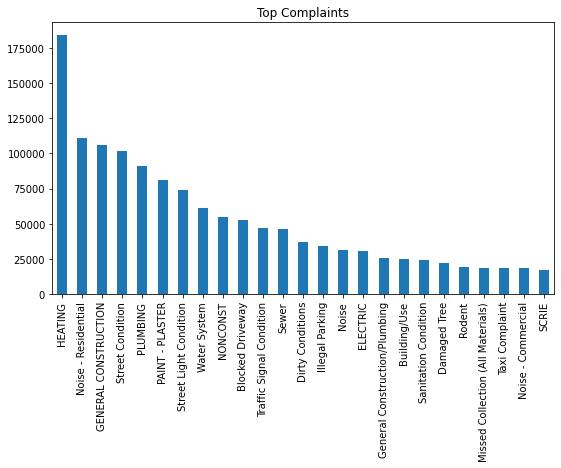

In [ ]:
top_complains = (df['Complaint Type'].value_counts()).head(25)
top_complains.plot(kind='bar', figsize=(9,5), title = 'Top Complaints')

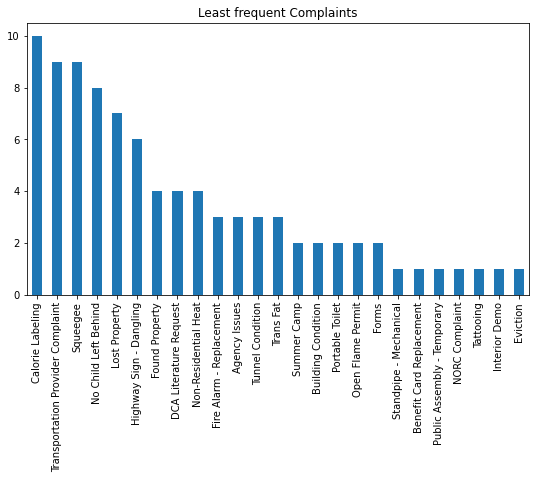

In [ ]:
least_complains = (df['Complaint Type'].value_counts()).tail(25)
least_complains.plot(kind='bar',figsize=(9,5),  title = 'Least frequent Complaints')

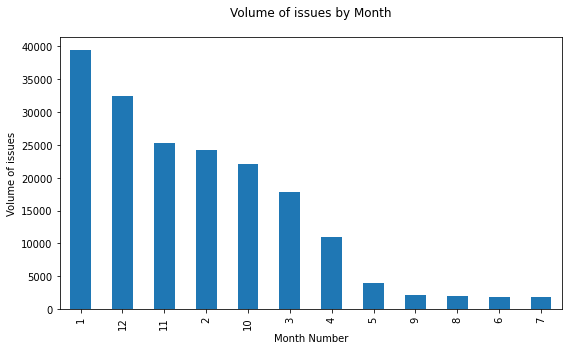

In [ ]:
df_heat = df[df["Complaint Type"] == "HEATING"]
df_heat['Month'].value_counts().plot(kind = 'bar',
                                               figsize = (9,5),
                                               title = 'Volume of issues by Month\n')
plt.xlabel('Month Number')
plt.ylabel('Volume of issues')
plt.show()

The heat complaints come though Nov to Feb, signifying that these are the months of Winter in NY.

##Exploring the geography of spread of quality of air in NewYork 

In [ ]:
df_AirQuality = df[df['Complaint Type'] == 'Air Quality']
#df_AirQuality.plot(kind='hexbin', x = 'Longitude', y = 'Latitude', gridsize = 40, colormap = 'jet', mincnt = 1, title = 'Air Quality issues across NYC\n', figsize = (10,6)).axis('equal')

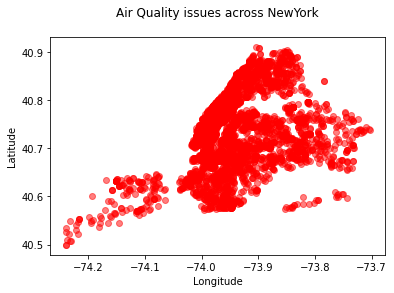

In [ ]:
plt.scatter(df_AirQuality['Longitude'], df_AirQuality['Latitude'], color = 'red', alpha = 0.5)
plt.title('Air Quality issues across NewYork\n')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

### Complaint distribution across Boroughs

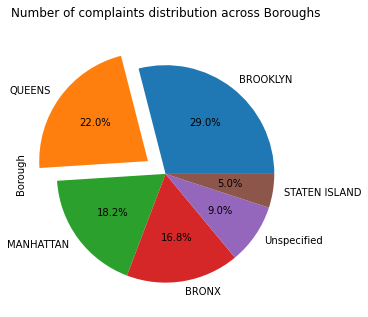

In [ ]:
df['Borough'].value_counts().plot(kind = 'pie', autopct='%1.1f%%', figsize=(9,5), explode=[0, 0.2,0, 0, 0, 0], title = 'Number of complaints distribution across Boroughs\n')

## Focusing our analysis for the largest district: Queens


In [ ]:
df_Queens = df[df['Borough'] == 'QUEENS']

In [ ]:
df_Queens.describe()

,Unique Key,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude,Resolution_Time,Day of Week,Day of Month,Month,Year
count,3.846530e+05,3.414400e+05,341440.000000,341440.000000,341440.000000,384653.000000,384653.000000,384653.000000,384653.000000,384653.0
mean,2.090270e+07,1.030769e+06,201130.051409,40.718595,-73.832197,20.775405,2.616088,15.761299,6.750721,2011.0
std,8.094862e+05,1.614256e+04,15864.911722,0.043575,0.058198,81.448623,1.844757,8.860978,3.330469,0.0
min,1.950305e+07,9.822440e+05,141416.000000,40.554810,-74.007239,0.000000,0.000000,1.000000,1.000000,2011.0
25%,2.024946e+07,1.017887e+06,191910.000000,40.693266,-73.878627,0.000000,1.000000,8.000000,4.000000,2011.0
50%,2.083738e+07,1.031211e+06,202870.000000,40.723368,-73.830621,1.000000,3.000000,16.000000,7.000000,2011.0
75%,2.157007e+07,1.042979e+06,213435.000000,40.752396,-73.788148,10.000000,4.000000,23.000000,10.000000,2011.0
max,3.356820e+07,1.067283e+06,230954.000000,40.800464,-73.700369,1812.000000,6.000000,31.000000,12.000000,2011.0


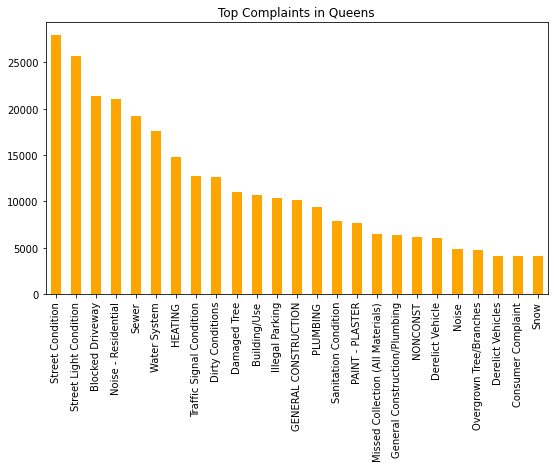

In [ ]:
(df_Queens['Complaint Type'].value_counts()).head(25).plot(kind = 'bar',
                                                              figsize = (9,5),
                                                              color = "orange",
                                                              title = 'Top Complaints in Queens')


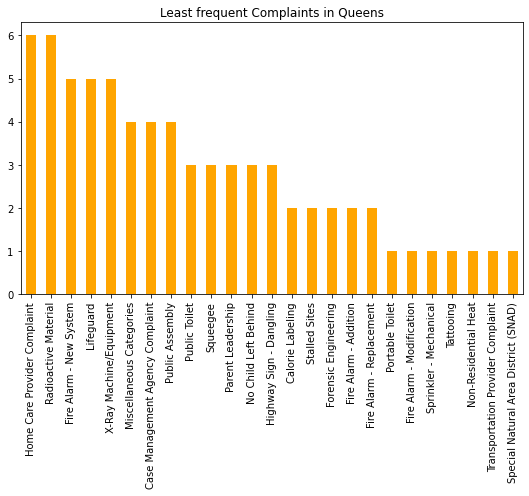

In [ ]:
(df_Queens['Complaint Type'].value_counts()).tail(25).plot(kind = 'bar',
                                                              figsize = (9,5),
                                                               color = "orange",
                                                              title = 'Least frequent Complaints in Queens')

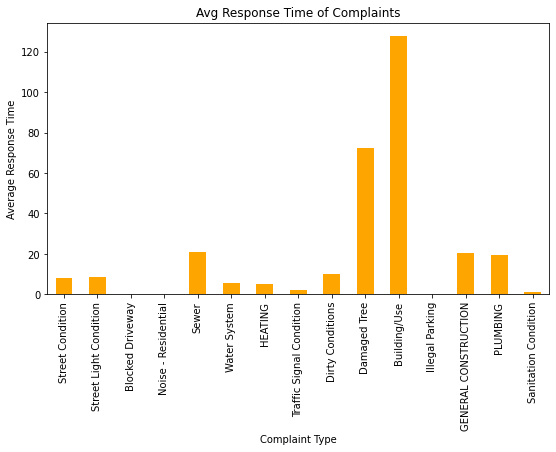

In [ ]:
plt.figure()
avgrstm_ct = df_Queens.groupby('Complaint Type').Resolution_Time.mean()
top_complains = df_Queens['Complaint Type'].value_counts().head(25)
avgrstm_ct = avgrstm_ct.loc[top_complains.index]
avgrstm_ct.head(15).plot(kind = 'bar',
                  figsize = (9,5),
                  color = "orange",
                  title = 'Avg Response Time of Complaints')
plt.xlabel('Complaint Type')
plt.ylabel('Average Response Time')
plt.show()

In [ ]:
# avgrstm_ct.head(15).plot(kind = 'line',
#                   figsize = (9,5),
#                   rot = 90,
#                   color = "red",
#                   title = 'Avg Response Time of Complaints')

We see that, generally, noise and illegal parking issues are resolved on the same day; while issues like unsanitary conditions and plumbing take relatively long times to resolve.

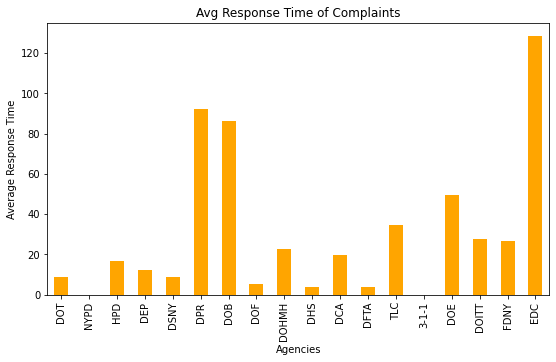

In [ ]:
plt.figure()
avgrstm_ag = df_Queens.groupby('Agency').Resolution_Time.mean()
agency = df_Queens['Agency'].value_counts().head(25)
avgrstm_ag = avgrstm_ag.loc[agency.index]
avgrstm_ag.head(25).plot(kind = 'bar',
                  figsize = (9,5),
                  color = "orange",
                  title = 'Avg Response Time of Complaints')
plt.xlabel('Agencies')
plt.ylabel('Average Response Time')
plt.show()

From the above graph we can conclude that NYPD and 3-1-1 are the most efficient agencies with the least avg response time. These are also the agencies which generally solve the most number of complaints.

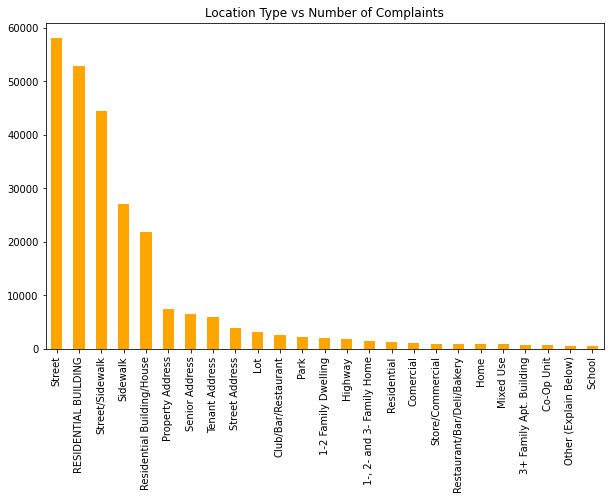

In [ ]:
(df_Queens['Location Type'].value_counts()).head(25).plot(kind = 'bar', 
                                                             figsize = (10,6),
                                                             color = "orange",
                                                             title = 'Location Type vs Number of Complaints')

This graph is telling us that most number of complaints in 2011 came from either street or residential locations. We can relate that most common complaint type is Street condition/ lighting followed blocked driveways and residential noise issues and these must be coming from streets followed by resedential buildings.

(-74.02258277211784, -73.6850255801132, 40.54252779637171, 40.812746775910405)

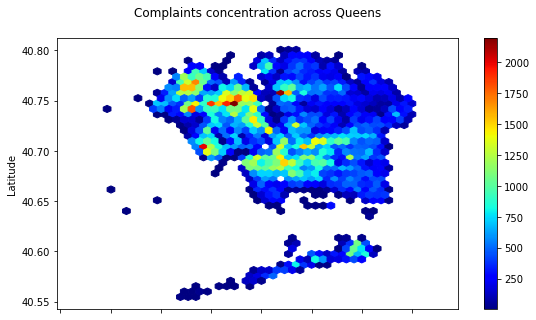

In [ ]:
df_Queens.plot(kind = 'hexbin', 
                  x = 'Longitude', 
                  y = 'Latitude',
                  gridsize = 40, 
                  colormap = 'jet',
                  mincnt = 1,
                  title = 'Complaints concentration across Queens\n', 
                  figsize = (9,5)).axis('equal')

## Lets work with the most common complain in Queens: Street Conditions

In [ ]:
df[df['Complaint Type'] == 'Street Condition']['Descriptor'].value_counts()

Pothole                           56740
Failed Street Repair              12827
Cave-in                           12188
Defective Hardware                 7232
Rough, Pitted or Cracked Roads     5847
Plate Condition - Noisy            2222
Blocked - Construction             1484
Line/Marking - Faded               1004
Plate Condition - Shifted           901
Unsafe Worksite                     669
Plate Condition - Open              494
Line/Marking - After Repaving       293
Guard Rail - Street                  87
Crash Cushion Defect                 46
Wear & Tear                           5
Name: Descriptor, dtype: int64

In [ ]:
df_QueensTopComplaint = df_Queens[df_Queens['Complaint Type'] == 'Street Condition']

(-73.9720317306979, -73.68767137611015, 40.54488776319476, 40.811712836015275)

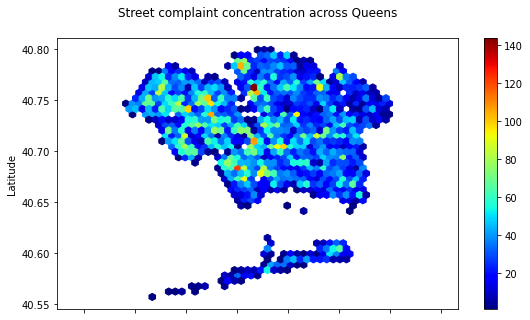

In [ ]:
df_QueensTopComplaint[df_QueensTopComplaint['Complaint Type'] == 'Street Condition'].plot(kind = 'hexbin',
                                                                                x ='Longitude', 
                                                                                y ='Latitude', 
                                                                                gridsize = 40,
                                                                                title = 'Street complaint concentration across Queens\n',
                                                                                colormap = 'jet', 
                                                                                mincnt = 1, 
                                                                                figsize = (9,5)).axis('equal')

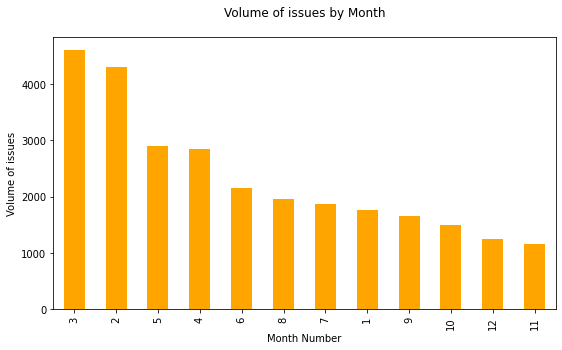

In [ ]:
df_QueensTopComplaint['Month'].value_counts().plot(kind = 'bar',
                                               figsize = (9,5),
                                               color = "orange",
                                               title = 'Volume of issues by Month\n')
plt.xlabel('Month Number')
plt.ylabel('Volume of issues')
plt.show()

We can see that heat issues are most common in the months of Feb March i.e. during winter days, probably due to roads blocks in the snow and malfunctionting of street lamps.

### Predicting the resolution time for Street issues in Queens

In [ ]:
totalnull = df_QueensTopComplaint.isnull().sum()
totaldistinct = df_QueensTopComplaint.nunique(dropna = True)
output_data = pd.DataFrame({'Null':totalnull, 'Distinct':totaldistinct}) 
output_data

,Null,Distinct
Unique Key,0,27920
Created Date,0,27841
Closed Date,0,24620
Agency,0,1
Agency Name,0,1
Complaint Type,0,1
Descriptor,0,14
Location Type,16044,1
Incident Zip,1777,133
Incident Address,11704,9730


A function to extract the features for the model. The features chosen from the dataset are based on intuition. The descriptor variable is broken into dummy variables so that it can be converted into categorical data. Similarly Incident Zip column is manipulated for bringing down the scale of column.

In [ ]:
def buildFeatures(dataset):
    df_features = dataset.filter(['Descriptor',
                                  'Incident Zip',
                                  'Resolution_Time',
                                  'Day of Week',
                                  'Day of Month',
                                  'Month'], axis = 1)
    data = pd.DataFrame({'descriptor': df_features.Descriptor})
    dummies = pd.get_dummies(data)
    df_model = pd.concat([df_features, dummies], axis = 1)
    df_model = df_model.drop('Descriptor', 1)
    df_model = df_model.dropna()
    df_model['Incident Zip'] = df_model['Incident Zip'].astype(int)
    df_model['Resolution_Time'] = df_model['Resolution_Time'].astype(int)
    df_model['Incident Zip'] = df_model['Incident Zip'] - df_model['Incident Zip'].min()
    return df_model

In [ ]:
df_new = buildFeatures(df_QueensTopComplaint)
df_new

,Incident Zip,Resolution_Time,Day of Week,Day of Month,Month,descriptor_Blocked - Construction,descriptor_Cave-in,descriptor_Crash Cushion Defect,descriptor_Defective Hardware,descriptor_Failed Street Repair,descriptor_Guard Rail - Street,descriptor_Line/Marking - After Repaving,descriptor_Line/Marking - Faded,descriptor_Plate Condition - Noisy,descriptor_Plate Condition - Open,descriptor_Plate Condition - Shifted,descriptor_Pothole,"descriptor_Rough, Pitted or Cracked Roads",descriptor_Unsafe Worksite
1012,376,9,0,31,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1777,420,3,4,18,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2397,419,15,2,9,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2457,431,8,0,14,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3299,421,24,4,8,4,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1703985,433,1,3,29,12,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1703990,357,1,3,29,12,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1703991,412,1,3,29,12,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1703995,384,1,3,29,12,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:

df_new = df_new[['Incident Zip',
                     'Day of Week',
                     'Day of Month',
                     'Month',
                     'descriptor_Blocked - Construction',
                     'descriptor_Failed Street Repair',
                     'Resolution_Time']]
df_new.describe()

,Incident Zip,Day of Week,Day of Month,Month,descriptor_Blocked - Construction,descriptor_Failed Street Repair,Resolution_Time
count,26143.000000,26143.000000,26143.000000,26143.000000,26143.000000,26143.000000,26143.000000
mean,376.130283,2.315419,15.169453,5.401369,0.009066,0.114868,7.988180
std,112.642445,1.694802,8.544866,3.160508,0.094782,0.318869,9.938183
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,361.000000,1.000000,8.000000,3.000000,0.000000,0.000000,1.000000
50%,377.000000,2.000000,15.000000,5.000000,0.000000,0.000000,5.000000
75%,419.000000,4.000000,22.000000,8.000000,0.000000,0.000000,10.000000
max,696.000000,6.000000,31.000000,12.000000,1.000000,1.000000,406.000000


### Train Test Splitter

In [ ]:
from sklearn.model_selection import train_test_split
def splitter(dataset,y):
    X_train, X_test, y_train, y_test = train_test_split(dataset, y, test_size=0.33, random_state=42)
    return X_train,X_test,y_train,y_test

In [ ]:
df_new.describe()

,Incident Zip,Day of Week,Day of Month,Month,descriptor_Blocked - Construction,descriptor_Failed Street Repair,Resolution_Time
count,26143.000000,26143.000000,26143.000000,26143.000000,26143.000000,26143.000000,26143.000000
mean,376.130283,2.315419,15.169453,5.401369,0.009066,0.114868,7.988180
std,112.642445,1.694802,8.544866,3.160508,0.094782,0.318869,9.938183
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,361.000000,1.000000,8.000000,3.000000,0.000000,0.000000,1.000000
50%,377.000000,2.000000,15.000000,5.000000,0.000000,0.000000,5.000000
75%,419.000000,4.000000,22.000000,8.000000,0.000000,0.000000,10.000000
max,696.000000,6.000000,31.000000,12.000000,1.000000,1.000000,406.000000


Our target variable has values ranging from 0 to 406. This can be a reason for the classifiers to perform poorly.

We can try dividing our target variable Resolution_Time into ranges. We can see from above that, Resolution_Time's min value is 0, max value is 406 and mean is at 8.

So we can divide it into following ranges: (0,1),(2,5),(5,10)

###  Binning the target variable

In [ ]:
# Since the data is highly imbalanced we are removing few outliers.
df_new.drop(df_new[df_new.Resolution_Time > 28].index, 
              inplace = True)
df_new.Resolution_Time.value_counts() 

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


0     3418
1     3151
5     1987
6     1962
4     1840
2     1808
3     1582
7     1472
8     1100
9      808
10     612
11     553
13     547
12     498
14     466
21     340
15     301
20     298
17     258
16     253
19     252
18     234
23     227
22     219
24     202
26     153
25     150
27     137
28      87
Name: Resolution_Time, dtype: int64

In [ ]:
df_new['categories'] = pd.cut(df_new['Resolution_Time'], 
                                [0,7,14,28],
                                include_lowest = True,
                                labels = [0,1,2])
df_new.describe()
df_new

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Incident Zip,Day of Week,Day of Month,Month,descriptor_Blocked - Construction,descriptor_Failed Street Repair,Resolution_Time,categories
1012,376,0,31,1,0,0,9,1
1777,420,4,18,2,0,0,3,0
2397,419,2,9,3,0,0,15,2
2457,431,0,14,3,0,0,8,1
3299,421,4,8,4,0,0,24,2
...,...,...,...,...,...,...,...,...
1703985,433,3,29,12,0,0,1,0
1703990,357,3,29,12,0,0,1,0
1703991,412,3,29,12,0,0,1,0
1703995,384,3,29,12,0,0,1,0


In [ ]:
# getDfSummary(df_new)

In [ ]:
df_new.dtypes

Incident Zip                            int64
Day of Week                             int64
Day of Month                            int64
Month                                   int64
descriptor_Blocked - Construction       uint8
descriptor_Failed Street Repair         uint8
Resolution_Time                         int64
categories                           category
dtype: object

### Logistic Regression

In [ ]:
X_train, X_test, y_train, y_test = splitter(df_new,df_new['categories'])
X1, Y1 = X_train.drop(['Resolution_Time','categories'],1), y_train
X2, Y2 = X_test.drop(['Resolution_Time','categories'],1), y_test
log = LogisticRegression(C = 1e30)
log.fit(X1,Y1)
print("Accuracy of Logistic Regression = ", accuracy_score(Y2,log.predict(X2))*100, "%", "\n\n")

Accuracy of Logistic Regression =  69.11943566042325 % 




/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
print(log.predict(X2))

[0 0 0 ... 0 0 0]


In [ ]:
print(classification_report(y_test, log.predict(X2)))

              precision    recall  f1-score   support

           0       0.69      1.00      0.82      5683
           1       0.00      0.00      0.00      1526
           2       0.00      0.00      0.00      1013

    accuracy                           0.69      8222
   macro avg       0.23      0.33      0.27      8222
weighted avg       0.48      0.69      0.56      8222



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Decision Tree Classifier

In [ ]:
dtc = DecisionTreeClassifier(criterion = 'entropy')
dtc = dtc.fit(X1,Y1)
y1_model = dtc.score(X1,Y1)
y2_model = dtc.score(X2,Y2)
print("Accuracy on training dataset of Decision Tree = ",
      y1_model*100,"%",
      "\nAccuracy on test dataset of Decision Tree = ",
      y2_model*100,"%")

Accuracy on training dataset of Decision Tree =  87.68346013298988 % 
Accuracy on test dataset of Decision Tree =  68.1099489175383 %


We can see that Decision Tree is more accurate. To evaluate our model better lets study the confusion matrix of both.

In [ ]:
Y2_pred = dtc.predict(X2)
dtc_cnf_matrix = confusion_matrix(Y2, Y2_pred)
dtc_cnf_matrix_n = dtc_cnf_matrix.astype('float') / dtc_cnf_matrix.sum(axis=1)[:, np.newaxis]
print("Decision Tree Confusion Matrix:\n ", dtc_cnf_matrix)
print("\nDecision Tree Normalized Confusion Matrix:\n ", dtc_cnf_matrix_n)

Decision Tree Confusion Matrix:
  [[4726  607  350]
 [ 934  493   99]
 [ 492  140  381]]

Decision Tree Normalized Confusion Matrix:
  [[0.83160303 0.10680978 0.06158719]
 [0.61205767 0.32306684 0.06487549]
 [0.48568608 0.13820336 0.37611056]]


In [ ]:
Y2_pred = log.predict(X2)
log_cnf_matrix = confusion_matrix(Y2, Y2_pred)
log_cnf_matrix_n = log_cnf_matrix.astype('float') / log_cnf_matrix.sum(axis=1)[:, np.newaxis]
print("Logistic Regression Confusion Matrix:\n ", log_cnf_matrix)
print("\nLogistic Regression Normalized Confusion Matrix:\n ", log_cnf_matrix_n)

Logistic Regression Confusion Matrix:
  [[5683    0    0]
 [1526    0    0]
 [1013    0    0]]

Logistic Regression Normalized Confusion Matrix:
  [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


So we can see from the above confusion matrices that our models are doing fairly good for the first two classes of output. But because of lack of data points for the third class, it's giving the wrong output for third class.

We can check if the accuracy improves if we scale our dataset and then do modelling.

### Scaling using sklearn Preprocessing

In [ ]:

scaled = preprocessing.scale(df_new[['Incident Zip', 
                                       'Day of Week',
                                       'Day of Month', 
                                       'Month']])
data_scaled = pd.DataFrame(scaled,
                          index = df_new.index,
                          columns = ['Incident Zip','Day of Week', 'Day of Month', 'Month'] )
data_scaled = pd.concat([data_scaled, df_new.iloc[:,4:6],
                        df_new['categories']], 
                       axis = 1)

In [ ]:
data_scaled.dtypes

Incident Zip                          float64
Day of Week                           float64
Day of Month                          float64
Month                                 float64
descriptor_Blocked - Construction       uint8
descriptor_Failed Street Repair         uint8
categories                           category
dtype: object

In [ ]:
data_scaled

,Incident Zip,Day of Week,Day of Month,Month,descriptor_Blocked - Construction,descriptor_Failed Street Repair,categories
1012,-0.001460,-1.363055,1.845726,-1.370447,0,0,1
1777,0.386928,0.992656,0.330213,-1.060103,0,0,0
2397,0.378101,-0.185200,-0.718988,-0.749759,0,0,2
2457,0.484026,-1.363055,-0.136099,-0.749759,0,0,1
3299,0.395755,0.992656,-0.835566,-0.439414,0,0,2
...,...,...,...,...,...,...,...
1703985,0.501680,0.403728,1.612570,2.043339,0,0,0
1703990,-0.169174,0.403728,1.612570,2.043339,0,0,0
1703991,0.316312,0.403728,1.612570,2.043339,0,0,0
1703995,0.069156,0.403728,1.612570,2.043339,0,0,0


In [ ]:
# data_scaled['Created Date']=data_scaled['Created Date'].map(dt.datetime.toordinal)
# data_scaled['Closed Date']=data_scaled['Closed Date'].map(dt.datetime.toordinal)

In [ ]:
# X_train, X_test, y_train, y_test = splitter(df_new,df_new['categories'])
# X1, Y1 = X_train.drop(['Resolution_Time','categories'],1), y_train
# X2, Y2 = X_test.drop(['Resolution_Time','categories'],1), y_test
# log = LogisticRegression(C = 1e30)
# log.fit(X1,Y1)
# print("Accuracy of Logistic Regression = ", accuracy_score(Y2,log.predict(X2))*100, "%")

### Logistic Regression on Scaled

In [ ]:
X_train, X_test, y_train, y_test = splitter(data_scaled, data_scaled.categories)
X1, Y1 = X_train.drop('categories', 1), y_train
X2, Y2 = X_test.drop('categories', 1), y_test
log = LogisticRegression(C = 1e30)
log.fit(X1,Y1)
print("Accurary of Logistic Regression: ", accuracy_score(Y2,log.predict(X2))*100, "%", '\n\n')

Accurary of Logistic Regression:  69.11943566042325 % 




### Decision Tree Classifier on Scaled

In [ ]:
dtc = DecisionTreeClassifier(criterion = 'entropy')
dtc = dtc.fit(X1,Y1)
y1_model = dtc.score(X1,Y1)
y2_model = dtc.score(X2,Y2)
print("Accuracy on training dataset of Decision Tree = ",
      y1_model*100, "%",
      "\nAccuracy on test dataset of Decision Tree = ",
      y2_model*100, "%")

Accuracy on training dataset of Decision Tree =  87.68346013298988 % 
Accuracy on test dataset of Decision Tree =  68.04913646314765 %


Even after scaling our dataset, we do not see any significant change in the accuracy.


## Working with Storm Dataset

In [ ]:
df_storm = pd.read_csv('/content/gdrive/My Drive/storm_data_search_results.csv', 
                       header = 0,
                       sep = ',', 
                       parse_dates = ['BEGIN_DATE'],
                       index_col = 'EVENT_ID')

In [ ]:
df_storm

,CZ_NAME_STR,BEGIN_LOCATION,BEGIN_DATE,BEGIN_TIME,EVENT_TYPE,MAGNITUDE,TOR_F_SCALE,DEATHS_DIRECT,INJURIES_DIRECT,DAMAGE_PROPERTY_NUM,DAMAGE_CROPS_NUM,STATE_ABBR,CZ_TIMEZONE,MAGNITUDE_TYPE,EPISODE_ID,CZ_TYPE,CZ_FIPS,WFO,INJURIES_INDIRECT,DEATHS_INDIRECT,SOURCE,FLOOD_CAUSE,TOR_LENGTH,TOR_WIDTH,BEGIN_RANGE,BEGIN_AZIMUTH,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EVENT_NARRATIVE,EPISODE_NARRATIVE,ABSOLUTE_ROWNUMBER
EVENT_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
277882,NORTHERN ONEIDA (ZONE),,2011-01-02,2200,Lake-Effect Snow,,,0,0,0,0,NY,EST-5,,47662,Z,9,BGM,0,0,Trained Spotter,,,,,,,,,,,,,A band of lake effect snow brought heavy snow ...,Persistent westerly flow downwind of Lake Onta...,1
275983,SOUTHERN HERKIMER (ZONE),,2011-01-04,2000,Lake-Effect Snow,,,0,0,0,0,NY,EST-5,,47381,Z,38,ALY,0,0,Trained Spotter,,,,,,,,,,,,,NaN,Colder air moving over the relatively warmer w...,2
280866,OSWEGO (ZONE),,2011-01-04,2230,Lake-Effect Snow,,,0,0,30000,0,NY,EST-5,,48120,Z,6,BUF,0,0,CoCoRaHS,,,,,,,,,,,,,NaN,A westerly flow of increasingly cold air follo...,3
280077,NORTHERN ONEIDA (ZONE),,2011-01-05,100,Lake-Effect Snow,,,0,0,0,0,NY,EST-5,,47663,Z,9,BGM,0,0,Trained Spotter,,,,,,,,,,,,,Twelve-hour snowfall totals ranged from 8 to 1...,A persistent westerly flow of cold air across ...,4
278443,MADISON (ZONE),,2011-01-05,1000,Lake-Effect Snow,,,0,0,0,0,NY,EST-5,,47664,Z,36,BGM,0,0,Trained Spotter,,,,,,,,,,,,,Storm total snowfall amounts ranged from 8 to ...,A low pressure system sitting over eastern Can...,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281755,EASTERN RENSSELAER (ZONE),,2011-02-07,2030,Winter Weather,,,0,0,0,0,NY,EST-5,,48251,Z,54,ALY,0,0,Broadcast Media,,,,,,,,,,,,,NaN,The combination of the passage of an arctic co...,274
279317,SOUTHWESTERN ST. LAWRENCE (ZONE),,2011-02-09,900,Lake-Effect Snow,,,0,0,5000,0,NY,EST-5,,47890,Z,87,BTV,0,0,COOP Observer,,,,,,,,,,,,,NaN,"On February 9th, a weak surface trough along w...",275
286255,OSWEGO (ZONE),,2011-02-09,2100,Lake-Effect Snow,,,0,0,50000,0,NY,EST-5,,48923,Z,6,BUF,0,0,CoCoRaHS,,,,,,,,,,,,,NaN,"This lake effect storm, as typical for late se...",276


In [ ]:
df_storm.CZ_NAME_STR.unique()

array(['NORTHERN ONEIDA (ZONE)', 'SOUTHERN HERKIMER (ZONE)',
       'OSWEGO (ZONE)', 'MADISON (ZONE)', 'DELAWARE (ZONE)',
       'CHENANGO (ZONE)', 'NORTHERN CAYUGA (ZONE)',
       'WESTERN ULSTER (ZONE)', 'WESTERN GREENE (ZONE)',
       'NORTHERN FULTON (ZONE)', 'SOUTHERN FULTON (ZONE)',
       'SCHOHARIE (ZONE)', 'MONTGOMERY (ZONE)',
       'WESTERN SCHENECTADY (ZONE)', 'EASTERN GREENE (ZONE)',
       'WESTERN ALBANY (ZONE)', 'NORTHERN HERKIMER (ZONE)',
       'SULLIVAN (ZONE)', 'EASTERN ALBANY (ZONE)',
       'EASTERN SCHENECTADY (ZONE)', 'SOUTHERN SARATOGA (ZONE)',
       'HAMILTON (ZONE)', 'NORTHERN SARATOGA (ZONE)', 'PUTNAM (ZONE)',
       'NORTHERN WESTCHESTER (ZONE)', 'EASTERN ULSTER (ZONE)',
       'NORTHERN WASHINGTON (ZONE)', 'SOUTHERN WASHINGTON (ZONE)',
       'EASTERN RENSSELAER (ZONE)', 'WESTERN RENSSELAER (ZONE)',
       'EASTERN COLUMBIA (ZONE)', 'WESTERN COLUMBIA (ZONE)',
       'WESTERN DUTCHESS (ZONE)', 'EASTERN DUTCHESS (ZONE)',
       'SOUTHEAST WARREN (ZONE)', 'N

In [ ]:
df.Borough.unique()

array(['Unspecified', 'MANHATTAN', 'BROOKLYN', 'STATEN ISLAND', 'QUEENS',
       'BRONX'], dtype=object)

In [ ]:
df_storm.CZ_NAME_STR.unique()

array(['NORTHERN ONEIDA (ZONE)', 'SOUTHERN HERKIMER (ZONE)',
       'OSWEGO (ZONE)', 'MADISON (ZONE)', 'DELAWARE (ZONE)',
       'CHENANGO (ZONE)', 'NORTHERN CAYUGA (ZONE)',
       'WESTERN ULSTER (ZONE)', 'WESTERN GREENE (ZONE)',
       'NORTHERN FULTON (ZONE)', 'SOUTHERN FULTON (ZONE)',
       'SCHOHARIE (ZONE)', 'MONTGOMERY (ZONE)',
       'WESTERN SCHENECTADY (ZONE)', 'EASTERN GREENE (ZONE)',
       'WESTERN ALBANY (ZONE)', 'NORTHERN HERKIMER (ZONE)',
       'SULLIVAN (ZONE)', 'EASTERN ALBANY (ZONE)',
       'EASTERN SCHENECTADY (ZONE)', 'SOUTHERN SARATOGA (ZONE)',
       'HAMILTON (ZONE)', 'NORTHERN SARATOGA (ZONE)', 'PUTNAM (ZONE)',
       'NORTHERN WESTCHESTER (ZONE)', 'EASTERN ULSTER (ZONE)',
       'NORTHERN WASHINGTON (ZONE)', 'SOUTHERN WASHINGTON (ZONE)',
       'EASTERN RENSSELAER (ZONE)', 'WESTERN RENSSELAER (ZONE)',
       'EASTERN COLUMBIA (ZONE)', 'WESTERN COLUMBIA (ZONE)',
       'WESTERN DUTCHESS (ZONE)', 'EASTERN DUTCHESS (ZONE)',
       'SOUTHEAST WARREN (ZONE)', 'N

In [ ]:
df_storm.columns

Index(['CZ_NAME_STR', 'BEGIN_LOCATION', 'BEGIN_DATE', 'BEGIN_TIME',
       'EVENT_TYPE', 'MAGNITUDE', 'TOR_F_SCALE', 'DEATHS_DIRECT',
       'INJURIES_DIRECT', 'DAMAGE_PROPERTY_NUM', 'DAMAGE_CROPS_NUM',
       'STATE_ABBR', 'CZ_TIMEZONE', 'MAGNITUDE_TYPE', 'EPISODE_ID', 'CZ_TYPE',
       'CZ_FIPS', 'WFO', 'INJURIES_INDIRECT', 'DEATHS_INDIRECT', 'SOURCE',
       'FLOOD_CAUSE', 'TOR_LENGTH', 'TOR_WIDTH', 'BEGIN_RANGE',
       'BEGIN_AZIMUTH', 'END_RANGE', 'END_AZIMUTH', 'END_LOCATION',
       'BEGIN_LAT', 'BEGIN_LON', 'END_LAT', 'END_LON', 'EVENT_NARRATIVE',
       'EPISODE_NARRATIVE', 'ABSOLUTE_ROWNUMBER'],
      dtype='object')

In [ ]:
df_storm = df_storm.rename(columns={'BEGIN_DATE': 'Created Date', 'CZ_NAME_STR': 'Storm_Borough'})

Performing inner join of storms dataframe and data of all 5 boroughs on Created Date column.

In [ ]:
result = pd.merge(df,df_storm[['Storm_Borough','Created Date','BEGIN_TIME','EVENT_TYPE']], on = 'Created Date')

In [ ]:
result.head(3)


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,City,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,Latitude,Longitude,Location,Resolution_Time,Day of Week,Day of Month,Month,Year,Storm_Borough,BEGIN_TIME,EVENT_TYPE
0,19625909,2011-01-18,2011-01-25,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,11233,246 SUMPTER STREET,SUMPTER STREET,BROOKLYN,Closed,NaN,The Department of Housing Preservation and Dev...,01/25/2011 12:00:00 AM,0 Unspecified,Unspecified,1007874.0,187240.0,Unspecified,Unspecified,40.680576,-73.914826,"(40.68057578695235, -73.91482598040905)",7.0,1,18,1,2011,WESTERN DUTCHESS (ZONE),100,Winter Storm
1,19625909,2011-01-18,2011-01-25,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,11233,246 SUMPTER STREET,SUMPTER STREET,BROOKLYN,Closed,NaN,The Department of Housing Preservation and Dev...,01/25/2011 12:00:00 AM,0 Unspecified,Unspecified,1007874.0,187240.0,Unspecified,Unspecified,40.680576,-73.914826,"(40.68057578695235, -73.91482598040905)",7.0,1,18,1,2011,WESTERN ULSTER (ZONE),100,Winter Storm
2,19625909,2011-01-18,2011-01-25,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,11233,246 SUMPTER STREET,SUMPTER STREET,BROOKLYN,Closed,NaN,The Department of Housing Preservation and Dev...,01/25/2011 12:00:00 AM,0 Unspecified,Unspecified,1007874.0,187240.0,Unspecified,Unspecified,40.680576,-73.914826,"(40.68057578695235, -73.91482598040905)",7.0,1,18,1,2011,EASTERN ULSTER (ZONE),100,Winter Weather


In [ ]:

#from google.colab import files
#result.to_csv('result.csv')
#files.download('result.csv') 
#!cp result.csv "drive/My Drive/"

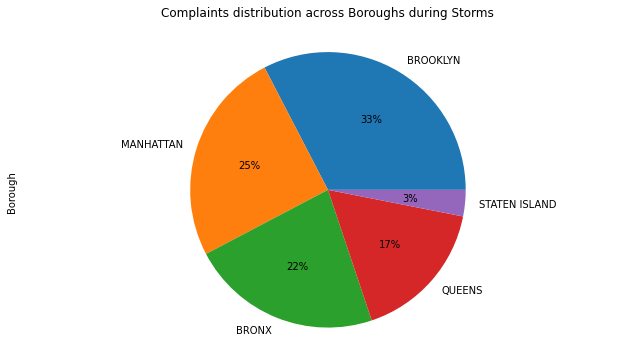

BROOKLYN         2841
MANHATTAN        2186
BRONX            1955
QUEENS           1459
STATEN ISLAND     270
Name: Borough, dtype: int64

In [ ]:
result = result[result['Borough'] != 'Unspecified']
result['Borough'].value_counts().plot(kind = 'pie', 
                                      autopct = '%1.0f%%', 
                                      figsize = (9,5))
plt.axis('equal')
plt.title('Complaints distribution across Boroughs during Storms\n')
plt.tight_layout()
plt.show()
result['Borough'].value_counts()

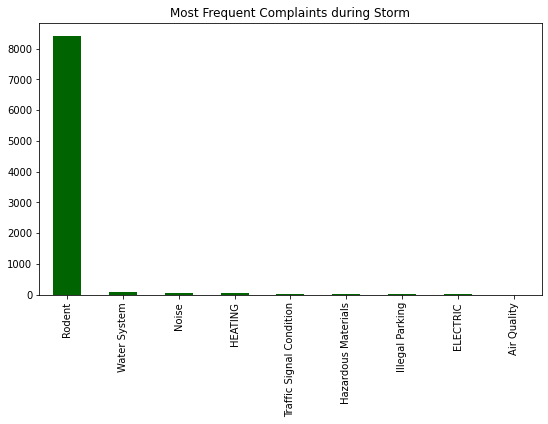

In [ ]:
(result['Complaint Type'].value_counts()).head(15).plot(kind = 'bar',
                                                        figsize = (9,5),
                                                        color = "darkgreen",
                                                        title = 'Most Frequent Complaints during Storm')

##The most type of complains during storm are complaints regarding Rodents.

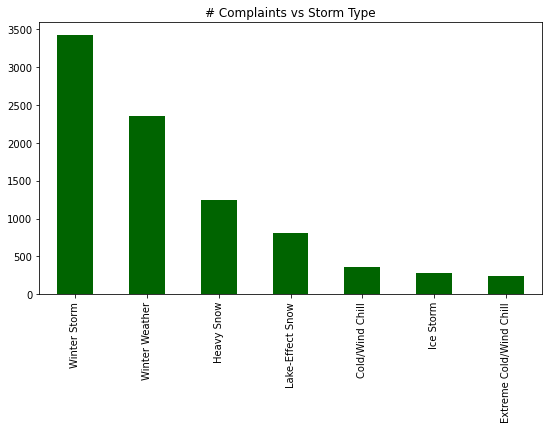

In [ ]:
(result['EVENT_TYPE'].value_counts()).head(25).plot(kind = 'bar',
                                                    figsize = (9,5),
                                                    color = "darkgreen",
                                                    title = '# Complaints vs Storm Type')

####Most complaints arise during winter storms.

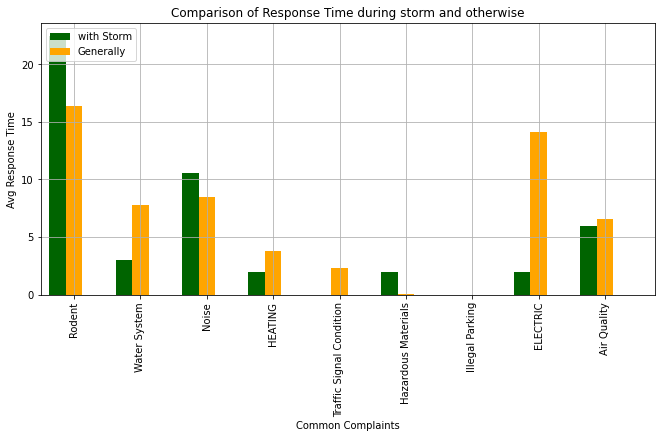

In [ ]:
storm = (result['Complaint Type'].value_counts()).head(15)
noStorm = df[df['Complaint Type'].isin(storm.index)]

var = result.groupby('Complaint Type').Resolution_Time.mean()
frequent = result['Complaint Type'].value_counts().head(15)
var = var.loc[frequent.index]

var1 = noStorm.groupby('Complaint Type').Resolution_Time.mean()
frequent1 = noStorm['Complaint Type'].value_counts().head(15)
var1 = var1.loc[frequent.index]

# Setting the positions and width for the bars
pos, width = list(range(len(var))), 0.25

# Plotting the bars
fig, ax = plt.subplots(figsize=(11,5))

plt.bar(pos, 
        var, 
        width,  
        color = 'darkgreen', 
        label = var.index[0]) 

plt.bar([p + width for p in pos], 
        var1,
        width,  
        color = 'orange', 
        label = var.index[1]) 

ax.set_ylabel('Avg Response Time')
ax.set_xlabel('Common Complaints')
ax.set_title('Comparison of Response Time during storm and otherwise')
ax.set_xticks([p + width for p in pos])
ax.set_xticklabels(var1.index)
plt.xlim(min(pos) - width, max(pos) + width * 4)
plt.xticks(rotation = 'vertical')
plt.legend(['with Storm', 'Generally'], loc = 'upper left')
plt.grid()

Hence, we can see that the avg response time for rodent problems increases during storm times, however; the electric complaints are solved on top priority hence decreasing their response time.